In [32]:
#!pip install openml --quiet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import openml
from gradient_descent import GDRegressor
from knn import KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
#Importing dataset from openml
diamonds = openml.datasets.get_dataset(42225)

C:\Users\admin\AppData\Local\Temp\ipykernel_14156\795755477.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  diamonds = openml.datasets.get_dataset(42225)


In [35]:
X, y, categorical_indicator, attribute_names = diamonds.get_data(
    target=diamonds.default_target_attribute,
    dataset_format='dataframe'
)

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [36]:
#Checking for missing values
X.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [37]:
#Checking the distribution of the target variable
y.value_counts()

price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64

In [38]:
if 'price' in X.columns:
    X = X.drop('price', axis=1)

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
le = preprocessing.LabelEncoder()
for column in ['cut', 'color', 'clarity']:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Custom Model: Execution Time = 2.9064042568206787 seconds


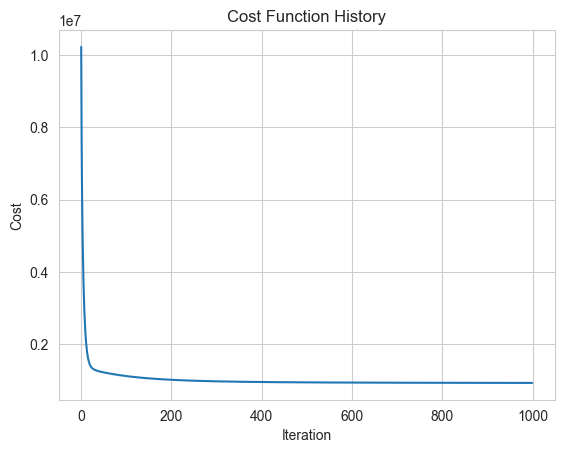

In [41]:
start_time = time.time()
model = GDRegressor(learning_rate=0.1, max_iter=1000)
model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Custom Model: Execution Time = {end_time - start_time} seconds")
predictions = model.predict(X_test_scaled)

#Plotting cost history
model.plot_cost_history()

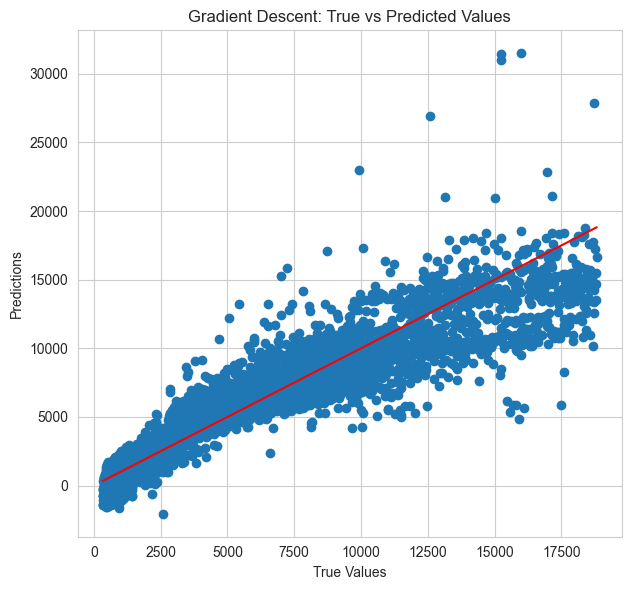

In [42]:
plt.figure(figsize=(12, 6))

#Scatter plot for Gradient Descent predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Gradient Descent: True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.tight_layout()
plt.show()

In [43]:
#SGDRegressor
start_time = time.time()
sgd_model = SGDRegressor()
sgd_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"SGDRegressor: Execution Time = {end_time - start_time} seconds")
sgd_predictions = sgd_model.predict(X_test_scaled)

SGDRegressor: Execution Time = 0.13246989250183105 seconds


In [44]:
#RandomForestRegressor
start_time = time.time()
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"RandomForestRegressor: Execution Time = {end_time - start_time} seconds")
rf_predictions = rf_model.predict(X_test_scaled)

RandomForestRegressor: Execution Time = 31.465869188308716 seconds


In [45]:
#Computing metrics
custom_mse = mean_squared_error(y_test, predictions)
sgd_mse = mean_squared_error(y_test, sgd_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

custom_r2 = r2_score(y_test, predictions)
sgd_r2 = r2_score(y_test, sgd_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Custom Model: MSE = {custom_mse}, R2 = {custom_r2}")
print(f"SGDRegressor: MSE = {sgd_mse}, R2 = {sgd_r2}")
print(f"RandomForestRegressor: MSE = {rf_mse}, R2 = {rf_r2}")

Custom Model: MSE = 1831175.3167148868, R2 = 0.8848087133437741
SGDRegressor: MSE = 1828445.8740676206, R2 = 0.8849804107271558
RandomForestRegressor: MSE = 298321.371530115, R2 = 0.9812338980817781


In [46]:
#KNN

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

start_time = time.time()
knn = KNN(k=3)
knn.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"Custom KNN Fit: Execution Time = {end_time - start_time} seconds")
knn_predictions = knn.predict(X_test_scaled)

#Calculating performance metrics
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print(f"KNN: MSE = {knn_mse}, R2 = {knn_r2}")

Custom KNN Fit: Execution Time = 0.0010001659393310547 seconds
KNN: MSE = 847777.9841490545, R2 = 0.9466699687891457


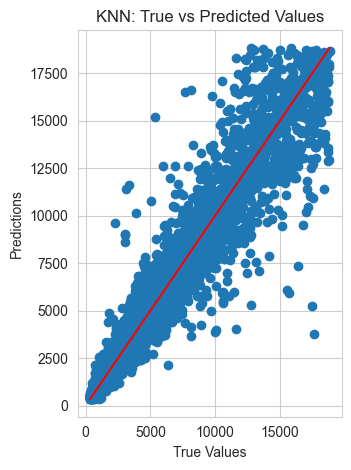

In [47]:
#Scatter plot for KNN predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN: True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.tight_layout()
plt.show()

In [48]:
#KNeighborsRegressor

knn_sklearn = KNeighborsRegressor(n_neighbors=3)

start_time = time.time()
knn_sklearn.fit(X_train_scaled, y_train)
end_time = time.time()
print(f"KNeighborsRegressor Fit: Execution Time = {end_time - start_time} seconds")

knn_sklearn_predictions = knn_sklearn.predict(X_test_scaled)

#Calculating performance metrics
knn_sklearn_mse = mean_squared_error(y_test, knn_sklearn_predictions)
knn_sklearn_r2 = r2_score(y_test, knn_sklearn_predictions)
print(f"KNeighborsRegressor: MSE = {knn_sklearn_mse}, R2 = {knn_sklearn_r2}")

KNeighborsRegressor Fit: Execution Time = 0.11971402168273926 seconds
KNeighborsRegressor: MSE = 670238.1414431673, R2 = 0.9578382292650044
